In [36]:
#Installations
install.packages("readxl")
library(readxl)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [38]:
#Loading the data 
data=read_excel("Elec-train.xlsx")
data

Timestamp,Power (kW),Temp (C°)
<chr>,<dbl>,<dbl>
1/1/2010 1:15,165.1,10.555556
1/1/2010 1:30,151.6,10.555556
1/1/2010 1:45,146.9,10.555556
1/1/2010 2:00,153.7,10.555556
1/1/2010 2:15,153.8,10.555556
1/1/2010 2:30,159.0,10.555556
1/1/2010 2:45,157.7,10.555556
1/1/2010 3:00,163.2,10.555556
1/1/2010 3:15,151.7,10.000000


In [86]:
#Creation of a time series tool (hourly periodical for the seasonal pattern).  
#We have observations every 15 mins so to make it an hour, we have to 60/15: our frequency = 4 
#Information from 1/1/2010 to 2/16/2010 are in Row 1 and line 4508 ; for electricity consumption Column 2 and for temperature Column 3

elec_consumption <- ts(data[1:4507,2], frequency = 4, start=c(1,2))
head(elec_consumption)  

,Qtr1,Qtr2,Qtr3,Qtr4
1,,165.1,151.6,146.9
2,153.7,153.8,159.0,


In [43]:
#Further Installation
install.packages("forecast")
install.packages("ggplot2")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



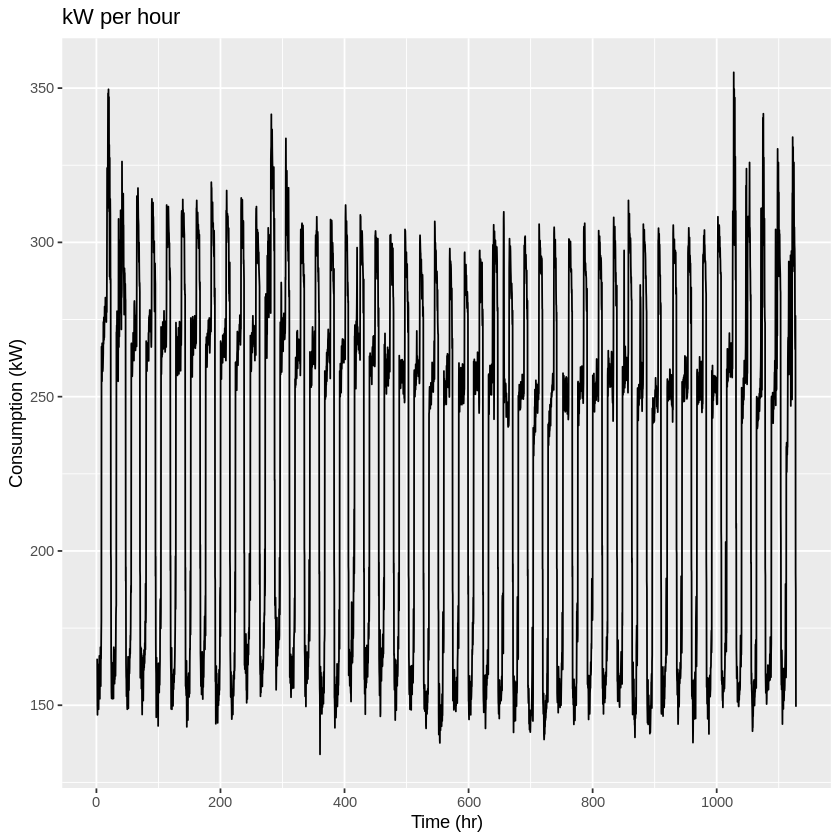

In [88]:
#Ploting the Data
library(forecast)
library(ggplot2)
autoplot(elec_consumption) + 
  ggtitle ('kW per hour') +
  xlab('Time (hr)') +
  ylab('Consumption (kW)')

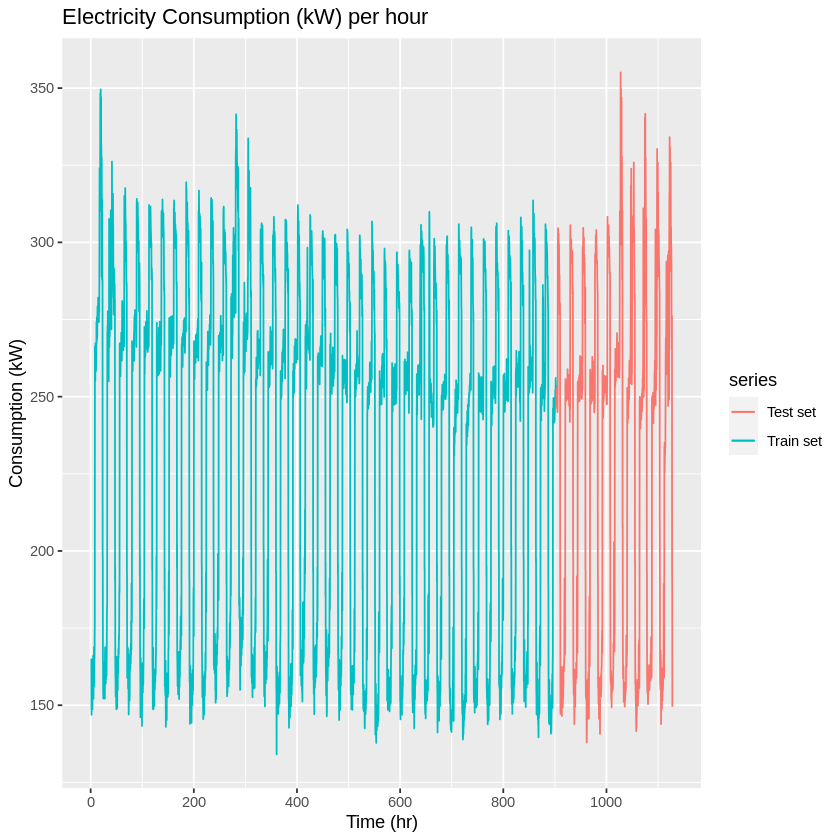

In [90]:
#We need to make two sets of data: the train one (80%) and the test one (20%) in order to evaluate the model.   
#The Time series tool for electicity consumption has 4507 observations so 80% will be 3607 observations in train set and 20% will be 900 observations in test set.


elec_consumption_train= window(consumption, start=c(1,2), end=c(902,4))
elec_consumption_test= window(consumption, start=c(903,1), end=c(1127,4))
autoplot(elec_consumption_train,series="Train set") + 
  autolayer(elec_consumption_test,series='Test set')+
  ggtitle ('Electricity Consumption (kW) per hour') +
  xlab('Time (hr)') +
  ylab('Consumption (kW)')

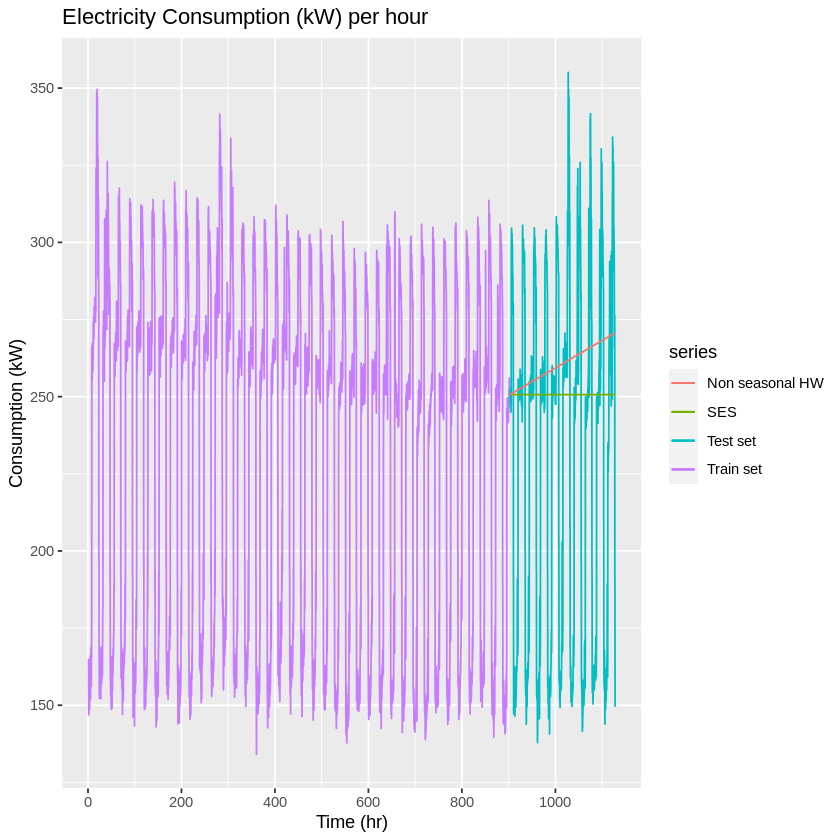

In [91]:
#**Exponential Smoothing**  


#Let's start forcecasting with models that do not concern seasonal pattern.

#Simple Exponential Smoothing (SES) 
#auto alpha selection, alpha = NULL
elec_consumption_SES = ses(elec_consumption_train,h=900, alpha=NULL)

#Non seasonal HW 
#auto alpha and beta selection
elec_consumption_NHW = holt(elec_consumption_train,h=900,alpha=NULL,beta=NULL)

#2 methods in the same graph
autoplot(elec_consumption_train,series="Train set") + 
  autolayer(elec_consumption_test,series='Test set')+
  autolayer(elec_consumption_SES$mean,series='SES')+
  autolayer(elec_consumption_NHW$mean,series='Non seasonal HW')+
  ggtitle ('Electricity Consumption (kW) per hour') +
  xlab('Time (hr)') +
  ylab('Consumption (kW)')

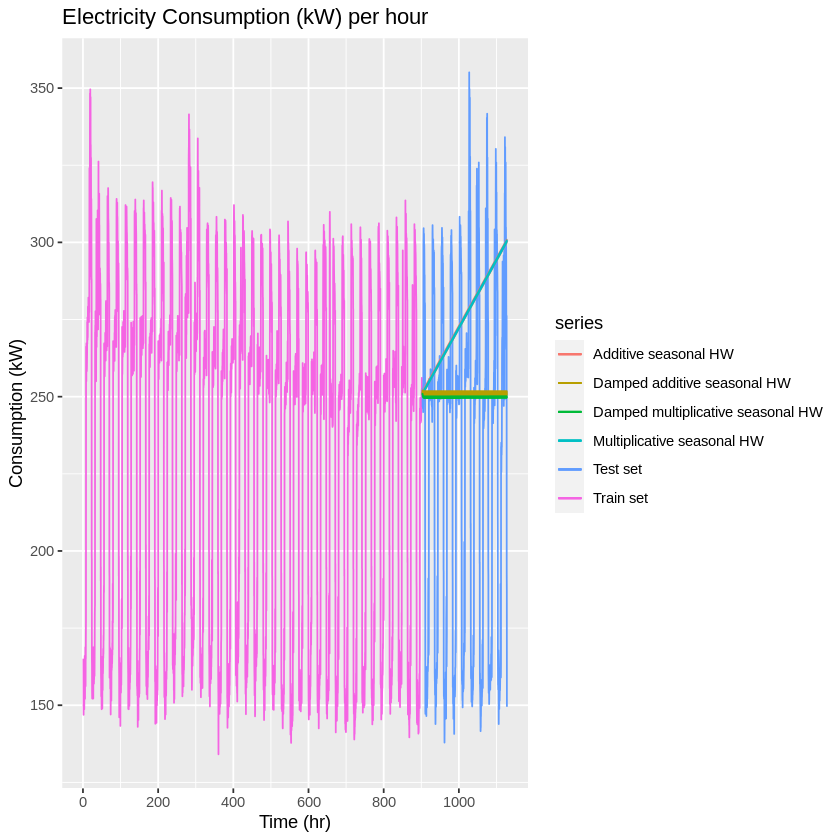

In [92]:
#The previous models are not good.

#Let's focus the forecasts into seasonal and linear trend.  

#Additive seasonal Holt-Winters 
elec_consumption_HW_add = hw(elec_consumption_train, seasonal='additive',h=900)

#Multiplicative seasonal Holt-Winters 
elec_consumption_HW_mul = hw(elec_consumption_train, seasonal='multiplicative',h=900)

#Damped additive seasonal Holt-Winters 
elec_consumption_DHW_add = hw(elec_consumption_train, seasonal='additive',h=900,damped=TRUE)

#Damped multiplicative seasonal Holt-Winters 
elec_consumption_DHW_mul = hw(elec_consumption_train, seasonal='multiplicative',h=900,damped=TRUE)

#Plot all 4 models
autoplot(elec_consumption_train,series="Train set") + 
  autolayer(elec_consumption_test,series='Test set')+
  autolayer(elec_consumption_HW_add$mean,series='Additive seasonal HW')+
  autolayer(elec_consumption_HW_mul$mean,series='Multiplicative seasonal HW')+
  autolayer(elec_consumption_DHW_add$mean,series='Damped additive seasonal HW')+
  autolayer(elec_consumption_DHW_mul$mean,series='Damped multiplicative seasonal HW')+
  ggtitle ('Electricity Consumption (kW) per hour') +
  xlab('Time (hr)') +
  ylab('Consumption (kW)')

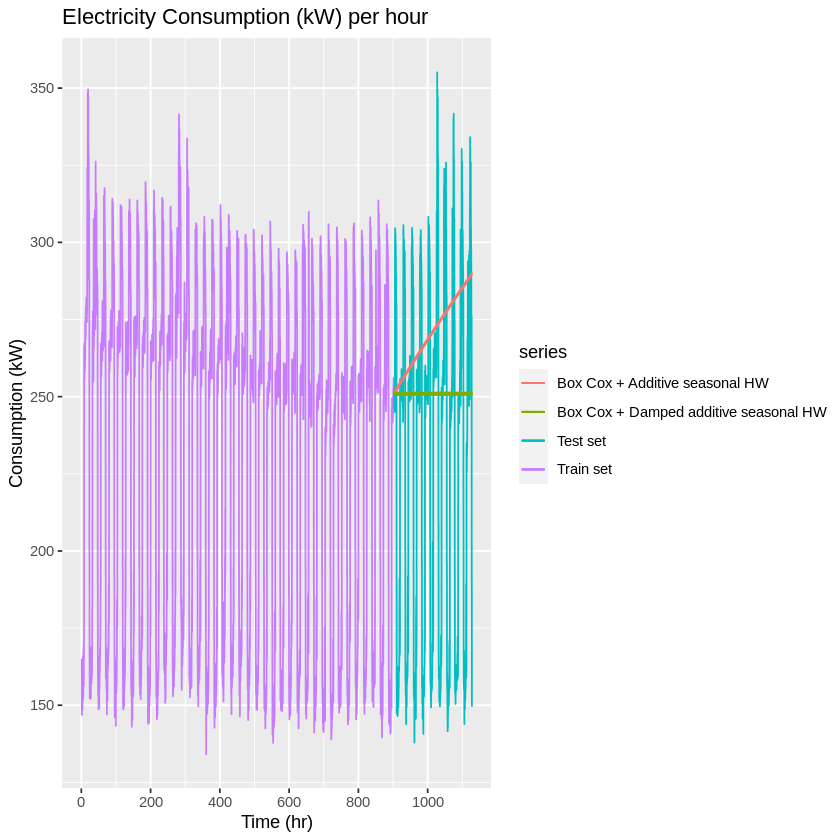

In [93]:
#The previous models are still not good 

#We can try to stabilize the variance by Box-Cox transformation in Additive HW models.

#Additive seasonal Holt-Winters 
elec_consumption_HW_addBC = hw(elec_consumption_train, seasonal='additive',h=900, lambda = 'auto' )

#Damped additive seasonal Holt-Winters 
elec_consumption_DHW_addBC = hw(elec_consumption_train, seasonal='additive',h=900,damped=TRUE, lambda = 'auto')

#Plot both models on the same graph
autoplot(elec_consumption_train,series="Train set") + 
  autolayer(elec_consumption_test,series='Test set')+
  autolayer(elec_consumption_HW_addBC$mean,series='Box Cox + Additive seasonal HW')+
  autolayer(elec_consumption_DHW_addBC$mean,series='Box Cox + Damped additive seasonal HW')+
  ggtitle ('Electricity Consumption (kW) per hour') +
  xlab('Time (hr)') +
  ylab('Consumption (kW)')

In [94]:
#We can see a small omprovement on the previous results. 

#We can then compute the root mean square error (RMSE) of each model to have a better view.

print(sqrt(mean((elec_consumption_SES$mean-elec_consumption_test)^2)))
print(sqrt(mean((elec_consumption_NHW$mean-elec_consumption_test)^2)))
print(sqrt(mean((elec_consumption_HW_add$mean-elec_consumption_test)^2)))
print(sqrt(mean((elec_consumption_HW_mul$mean-elec_consumption_test)^2)))
print(sqrt(mean((elec_consumption_DHW_add$mean-elec_consumption_test)^2)))
print(sqrt(mean((elec_consumption_DHW_mul$mean-elec_consumption_test)^2)))
print(sqrt(mean((elec_consumption_HW_addBC$mean-elec_consumption_test)^2)))
print(sqrt(mean((elec_consumption_DHW_addBC$mean-elec_consumption_test)^2)))


[1] 60.76483
[1] 64.57402
[1] 73.46383
[1] 73.40462
[1] 60.91925
[1] 60.48178
[1] 70.18168
[1] 60.84705


In [ ]:
The model with the lowest error so far is Damped multiplicative Holt-Winters, however; this is not because it is the best model (See that the prediction pattern is not correlate with pattern of test set).     
This low error is just because our calculation base on mean different and Damped multiplicative Holt-Winters gives us the linear model that situates around the middle of the graph.    
We should also consider that all alpha, beta, gamma and phi parameters used above are automatically chosen just to screen and see the pattern of each forecasting model.    
Therefore, if we really want to compare between each model, the parameters should be fixed.    
(For example, if you want to compare the effect of damped version to multiplicative Holt-Winters model, you should fix alpha, beta and gamma for both model (the only difference will be with or without phi parameter))    
But we will not consider them now since clearly we cannot use any exponential smoothing for our forecast.    

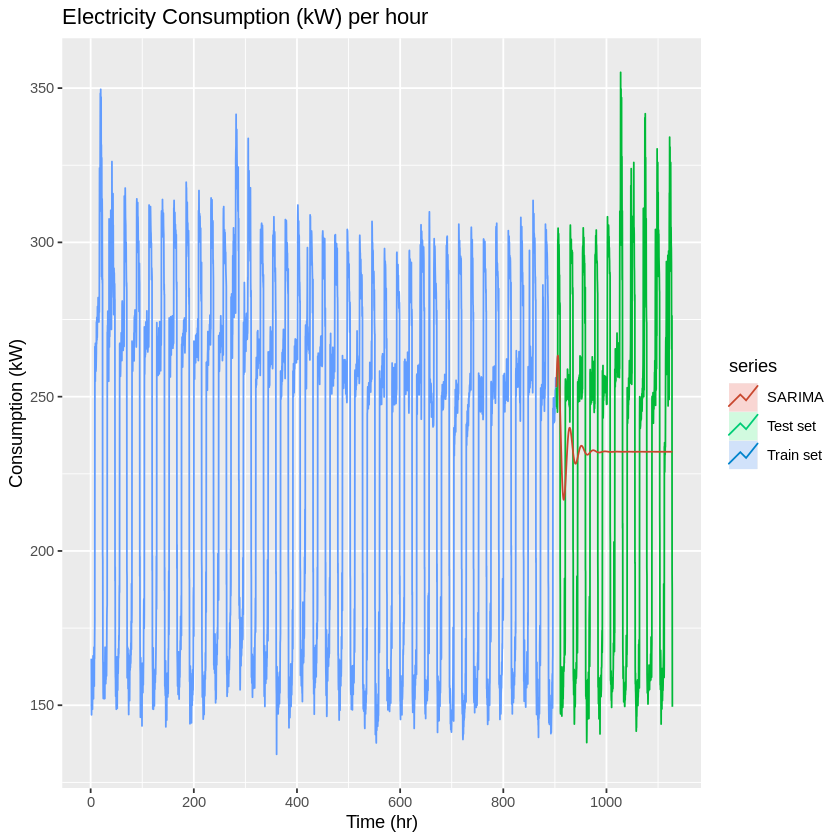

In [95]:
#**Forecasting with ARIMA**  


#automaticaly SARIMA model.   

elec_consumption_SARIMA = auto.arima(elec_consumption_train)
pred_elec_consumption_SARIMA = forecast(elec_consumption_SARIMA,h=900)
autoplot(elec_consumption_train,series="Train set") + 
  autolayer(elec_consumption_test,series='Test set')+
  autolayer(pred_elec_consumption_SARIMA,series='SARIMA',PI=FALSE)+
  ggtitle ('Electricity Consumption (kW) per hour') +
  xlab('Time (hr)') +
  ylab('Consumption (kW)')

In [54]:
#The model is not perfect although it looks better than the previous ones. 

# We can see the root mean square error (RMSE).

print(sqrt(mean((pred_consum_SARIMA$mean-consum_test)^2)))

[1] 56.392


In [ ]:
#This model shows less error but the prediction pattern are still not so good.  
#We should look for a model that is more flexible like Neural Network Auto-Regression.  




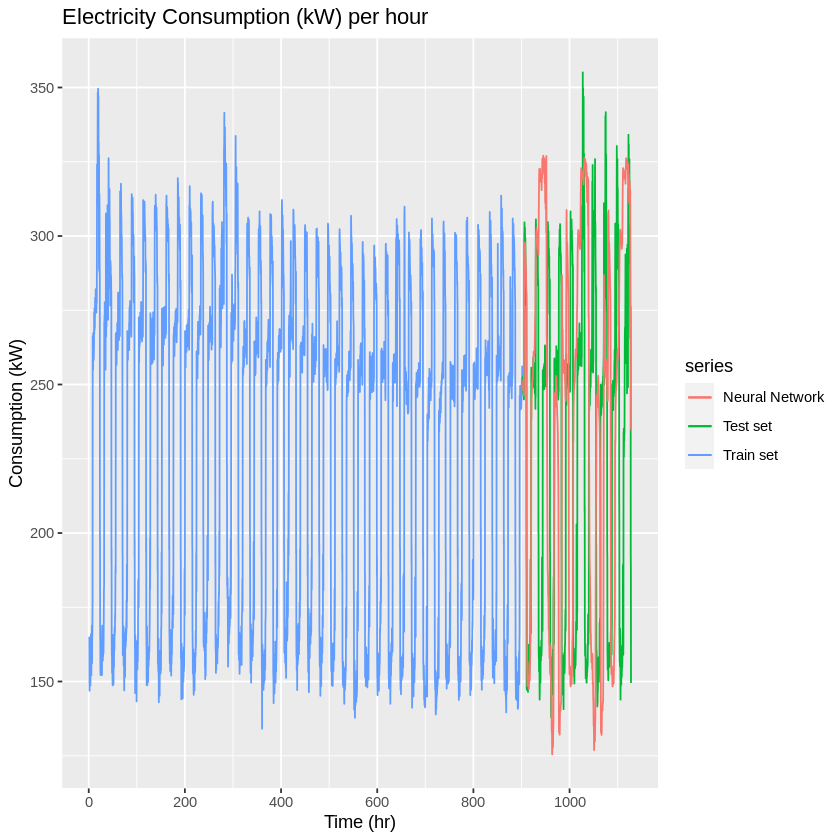

In [96]:
#**Neural Network Auto-Regression**  


#automatically choose the parameters p and k

elec_consumption_train_NN = nnetar(elec_consumption_train)
pred_elec_consumption_train_NN = forecast(elec_consumption_train_NN, h = 900)
autoplot(elec_consumption_train,series="Train set") + 
  autolayer(elec_consumption_test,series='Test set')+
  autolayer(pred_elec_consumption_train_NN$mean,series='Neural Network')+
  ggtitle ('Electricity Consumption (kW) per hour') +
  xlab('Time (hr)') +
  ylab('Consumption (kW)')


In [97]:
#We can see the root mean square error (RMSE)
print(sqrt(mean((pred_elec_consumption_train_NN$mean-elec_consumption_test)^2)))

[1] 89.75295


In [ ]:
Even the error is higher than SARIMA model but the prediction pattern seems correct. 
This correlates with the information from auto-correlation function (acf) below.  
See that auto-correlation declines slowly as the number of lags increases. 
This is a property of non-stationarity that will effect the efficiency of several forecasting models.  
It also possible that our data might has no seasonal but cyclic pattern. In that case, they cannot be modelized by usual linear model.   

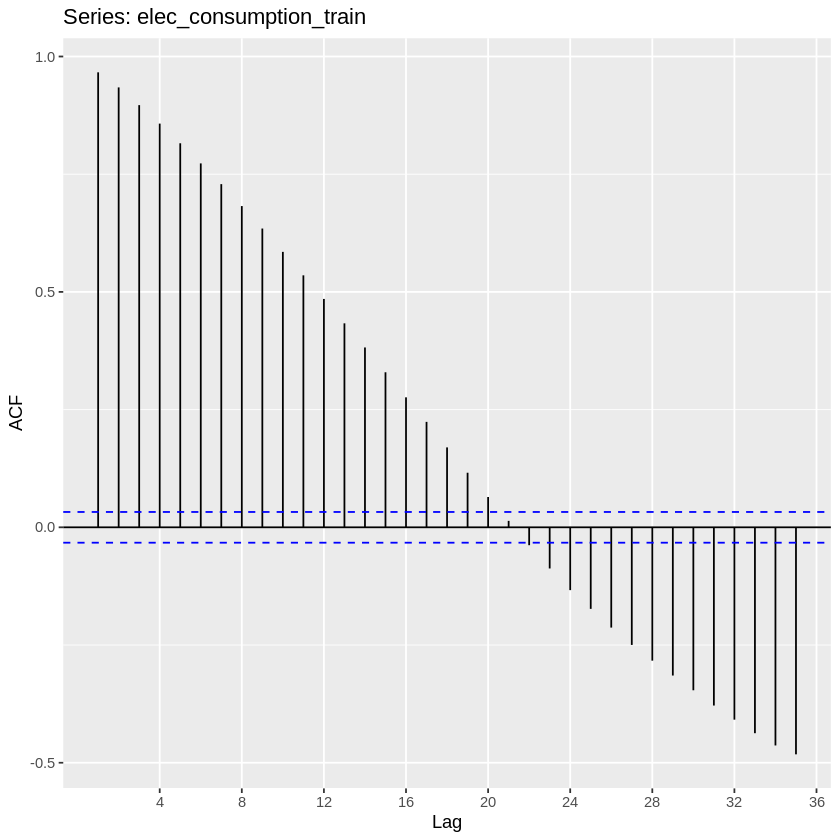

In [98]:
#let's check the Auto-correlation pattern

ggAcf(elec_consumption_train)


In [99]:
#let's see information from Neural network model to do more precision    

#Let's the model information for further adjustment to improve the model
print(elec_consumption_train_NN)

Series: elec_consumption_train 
Model:  NNAR(35,1,18)[4] 
Call:   nnetar(y = elec_consumption_train)

Average of 20 networks, each of which is
a 35-18-1 network with 667 weights
options were - linear output units 

sigma^2 estimated as 48.52


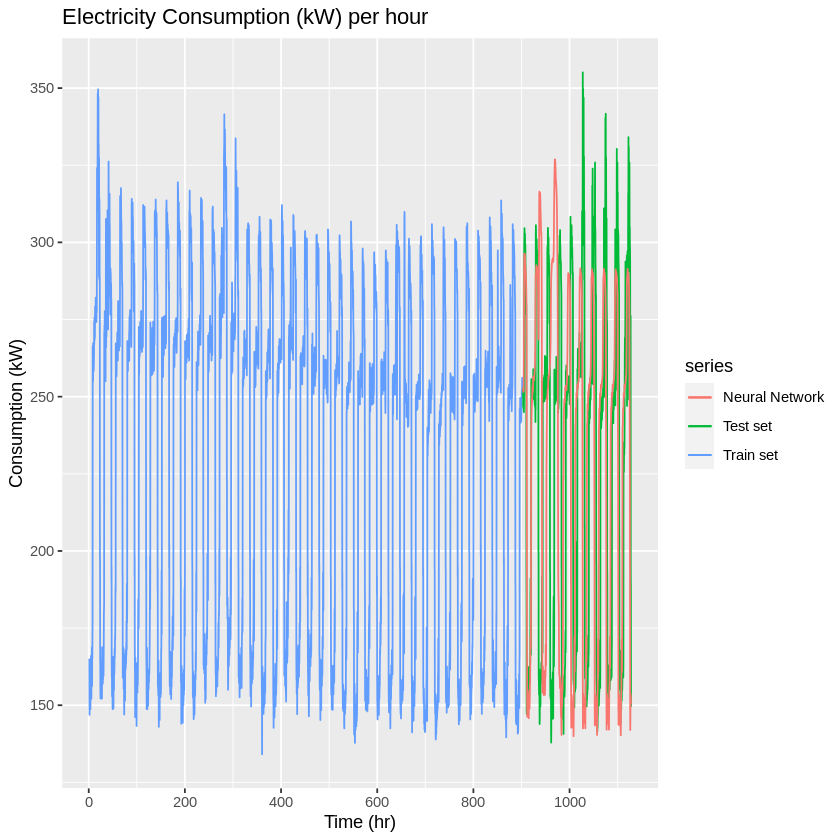

In [111]:
#We can try to add more neurons to the model in order to stabilize variance by Box-Cox transformation.

elec_consumption_train_NN2 = nnetar(elec_consumption_train,34,2,24,lambda='auto')
pred_consumption_train_NN2 = forecast(elec_consumption_train_NN2, h = 900)
autoplot(elec_consumption_train,series="Train set") + 
  autolayer(elec_consumption_test,series='Test set')+
  autolayer(pred_consumption_train_NN2$mean,series='Neural Network')+
  ggtitle ('Electricity Consumption (kW) per hour') +
  xlab('Time (hr)') +
  ylab('Consumption (kW)')



In [126]:
#RSME
print(sqrt(mean((pred_consumption_train_NN2$mean-consum_test)^2)))

[1] 70.82671


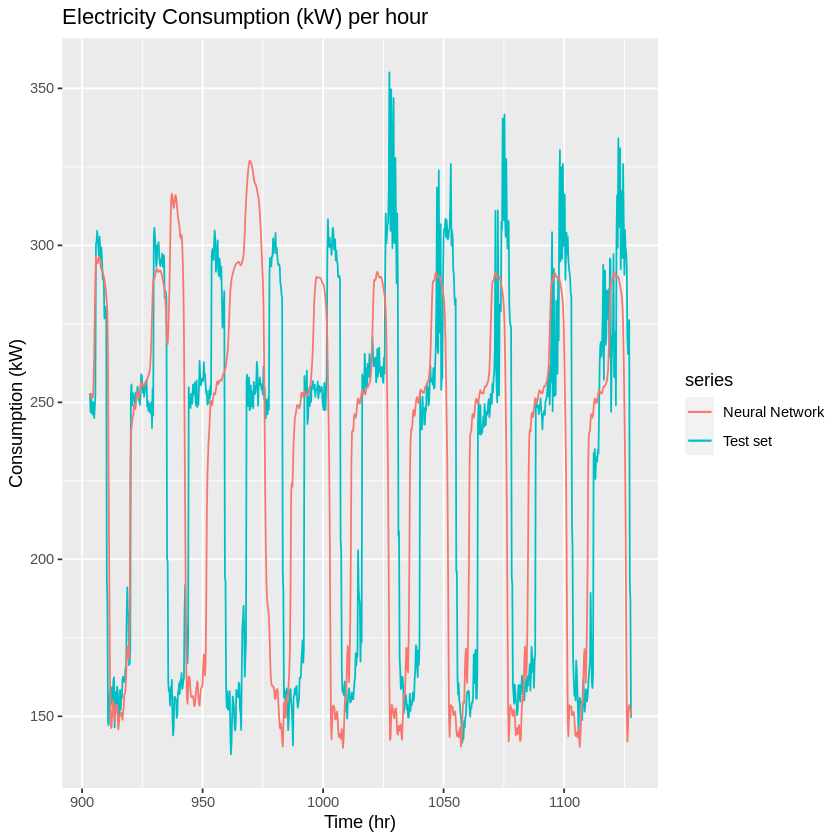

In [127]:
#The RSME is the lower.
#This definitely is the best model so far!

#Let's clearly see the prediction again. 

autoplot(elec_consumption_test,series='Test set') + 
  autolayer(pred_consumption_train_NN2$mean,series='Neural Network')+
  ggtitle ('Electricity Consumption (kW) per hour') +
  xlab('Time (hr)') +
  ylab('Consumption (kW)')

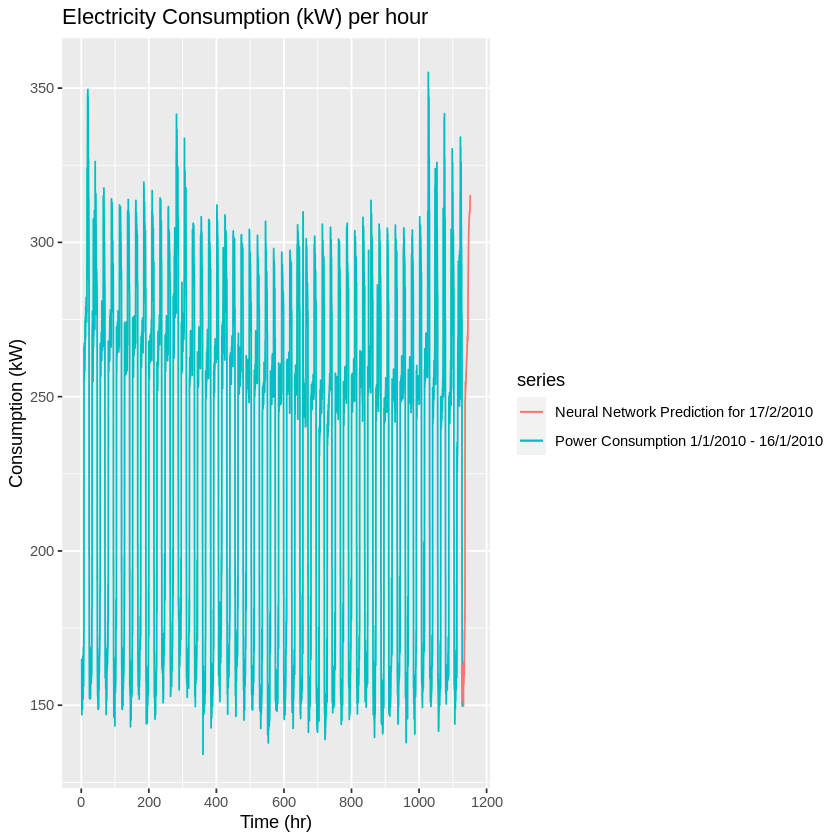

In [115]:
#We will now predict the electricity consumption of 17/2/2010 based on the whole previous consumption information.  
#The prediction interval = 24 hr for the entire day of 17/2/2010.So h =(24*60)/15 = 96 observations 

elec_consumption_17 = nnetar(elec_consumption,34,2,24,lambda='auto')
pred_consumption_17 = forecast(elec_consumption_17, h = 96)
autoplot(elec_consumption,series="Power Consumption 1/1/2010 - 16/1/2010") + 
  autolayer(pred_consumption_17$mean,series='Neural Network Prediction for 17/2/2010')+
  ggtitle ('Electricity Consumption (kW) per hour') +
  xlab('Time (hr)') +
  ylab('Consumption (kW)')



In [116]:
#Prediction results
Prediction = print(pred_consumption_17)

         Qtr1     Qtr2     Qtr3     Qtr4
1128 158.6533 163.0378 155.0874 158.1669
1129 160.3269 157.5224 155.6383 158.9691
1130 151.6019 152.6908 156.3670 151.9824
1131 154.0629 154.5866 149.7468 164.0757
1132 161.8061 157.1172 156.6547 158.6329
1133 162.6805 161.0620 159.4285 162.5092
1134 161.7787 167.5150 174.0916 172.8810
1135 171.2581 175.9263 180.6025 177.1441
1136 185.1296 248.2720 249.5843 248.6543
1137 250.5490 254.8309 251.8205 252.9783
1138 254.1453 252.9727 254.0142 255.0009
1139 255.9246 257.8247 256.1324 257.7025
1140 258.9792 259.4682 261.1674 261.6488
1141 261.2376 262.5492 263.2595 264.1205
1142 263.3185 266.9455 266.8413 266.7431
1143 268.7878 269.4754 269.7725 268.1605
1144 268.2331 268.7007 271.4292 275.6280
1145 279.9175 284.1959 288.2688 291.3127
1146 293.8405 296.1970 298.7442 300.5141
1147 301.9335 303.4434 304.4055 305.4933
1148 306.2490 307.1124 307.8022 308.2401
1149 309.1157 309.6014 309.5104 309.5591
1150 309.9607 309.6210 309.8467 311.3706
1151 312.6636 31

In [142]:
#Save prediction results to csv file
library("readr")
write_csv(Prediction,file="Prediction.csv")

ERROR: Error in write_xls(Prediction, file = "Prediction.xlss"): could not find function "write_xls"


In [143]:
install.packages("xlsx")


also installing the dependencies ‘rJava’, ‘xlsxjars’


Warning message in install.packages("xlsx"):
“installation of package ‘rJava’ had non-zero exit status”
Warning message in install.packages("xlsx"):
“installation of package ‘xlsxjars’ had non-zero exit status”
Warning message in install.packages("xlsx"):
“installation of package ‘xlsx’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [146]:
library(xlsx)
write.xlsx(x, file, sheetName = "Sheet1", 
  col.names = TRUE, row.names = TRUE, append = FALSE)

ERROR: Error in library(xls): there is no package called ‘xls’


In [117]:
#**Part 2: Forecast electricity consumption (kW) for 2/17/2010 by using outdoor temperature**


#Let's create the time series tool 

temperature <- ts(data[1:4507,3], frequency = 4, start=c(1,2))
head(temperature)    

,Qtr1,Qtr2,Qtr3,Qtr4
1,,10.55556,10.55556,10.55556
2,10.55556,10.55556,10.55556,


In [118]:
#Division of the data into train set and test set 

temperature_train=window(temperature, start=c(1,2), end=c(902,4))
temperature_test=window(temperature, start=c(903,1), end=c(1127,4))

In [119]:
#**Time series linear regression model**

#We have to verify the effect of temperature to electricity consumption
effect_temp_on_consum_train=tslm(elec_consumption_train~temperature_train)
summary(effect_temp_on_consum_train)


Call:
tslm(formula = elec_consumption_train ~ temperature_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-120.990  -42.802    3.352   42.980  111.862 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       126.9146     3.5111   36.15   <2e-16 ***
temperature_train   9.8478     0.3201   30.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.23 on 3605 degrees of freedom
Multiple R-squared:  0.2079,	Adjusted R-squared:  0.2077 
F-statistic: 946.4 on 1 and 3605 DF,  p-value: < 2.2e-16


In [120]:
#The effect of temperature to electricity consumption are statisticaly significant.
#We can add trend and seasonal pattern to this regression.

effect_temp_on_consum_train_TS=tslm(elec_consumption_train~temperature_train+trend+season)
summary(effect_temp_on_consum_train_TS)


Call:
tslm(formula = elec_consumption_train ~ temperature_train + trend + 
    season)

Residuals:
     Min       1Q   Median       3Q      Max 
-126.036  -42.603    2.417   43.367  122.385 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.364e+02  3.840e+00  35.518   <2e-16 ***
temperature_train  1.052e+01  3.200e-01  32.860   <2e-16 ***
trend             -9.358e-03  8.189e-04 -11.427   <2e-16 ***
season2            8.305e-01  2.372e+00   0.350    0.726    
season3            6.520e-01  2.372e+00   0.275    0.783    
season4           -2.761e-01  2.372e+00  -0.116    0.907    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.35 on 3601 degrees of freedom
Multiple R-squared:  0.2357,	Adjusted R-squared:  0.2347 
F-statistic: 222.1 on 5 and 3601 DF,  p-value: < 2.2e-16


In [121]:
#Seems like seasonal pattern play no role
#Let's try to consider only trend.

effect_temp_on_consum_train_T=tslm(elec_consumption_train~temperature_train+trend)
summary(effect_temp_on_consum_train_T)


Call:
tslm(formula = elec_consumption_train ~ temperature_train + trend)

Residuals:
     Min       1Q   Median       3Q      Max 
-125.686  -42.643    2.713   43.220  121.808 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.367e+02  3.554e+00   38.46   <2e-16 ***
temperature_train  1.052e+01  3.199e-01   32.87   <2e-16 ***
trend             -9.358e-03  8.186e-04  -11.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.33 on 3604 degrees of freedom
Multiple R-squared:  0.2357,	Adjusted R-squared:  0.2352 
F-statistic: 555.6 on 2 and 3604 DF,  p-value: < 2.2e-16


In [122]:
#Compare all models

CV(effect_temp_on_consum_train)
CV(effect_temp_on_consum_train_TS)
CV(effect_temp_on_consum_train_T)

CV          AIC         AICc          BIC        AdjR2 
2.625580e+03 2.840073e+04 2.840073e+04 2.841930e+04 2.077181e-01

CV          AIC         AICc          BIC        AdjR2 
2.539092e+03 2.827996e+04 2.827999e+04 2.832330e+04 2.346533e-01

CV          AIC         AICc          BIC        AdjR2 
2.535074e+03 2.827426e+04 2.827427e+04 2.829902e+04 2.352279e-01


	Ljung-Box test

data:  Residuals from Linear regression model
Q* = 17482, df = 5, p-value < 2.2e-16

Model df: 3.   Total lags used: 8



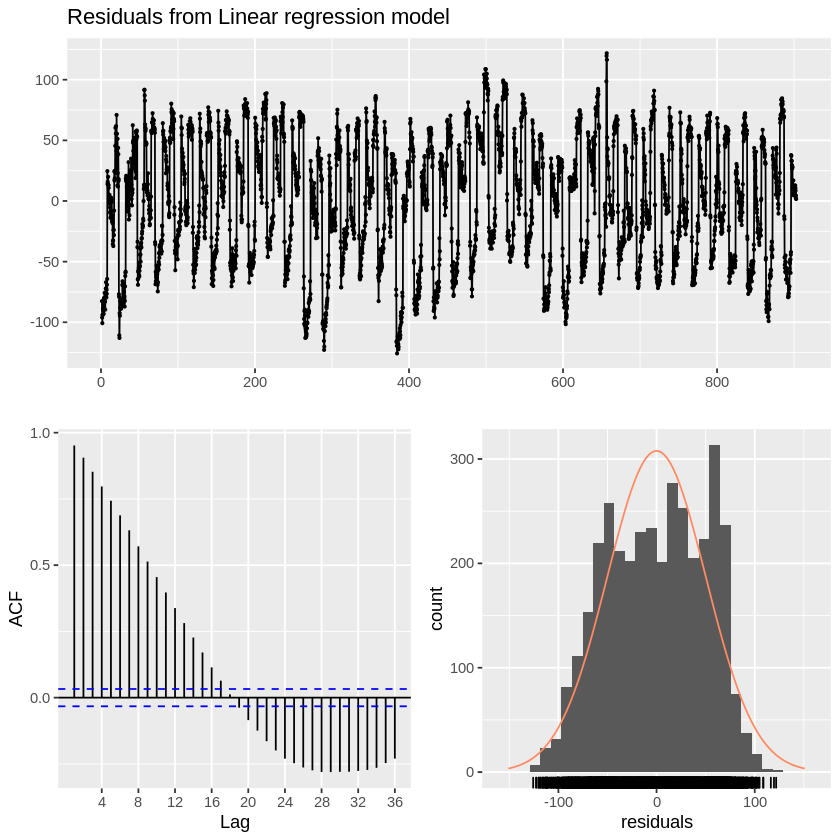

In [123]:
#We will choose the last model for the rest of the exercise because this model has the lowest AIC and the highest Adjusted R squared. 

#We don't forget that Time series linear regression model assumes that the residuals are independent and identically distributed. Therefore we have to see the residuals of our model first.

checkresiduals(fit_train_T,test="LB",plot=TRUE)

In [124]:
#The previous results have proved that the residuals are dependent, so we can not go for the linear regression model.     

#The appropriate model in case the residual are not independent to each other is the Dynamic regression model.


	Ljung-Box test

data:  Residuals from Regression with ARIMA(2,1,2) errors
Q* = 2.5285, df = 3, p-value = 0.4702

Model df: 5.   Total lags used: 8



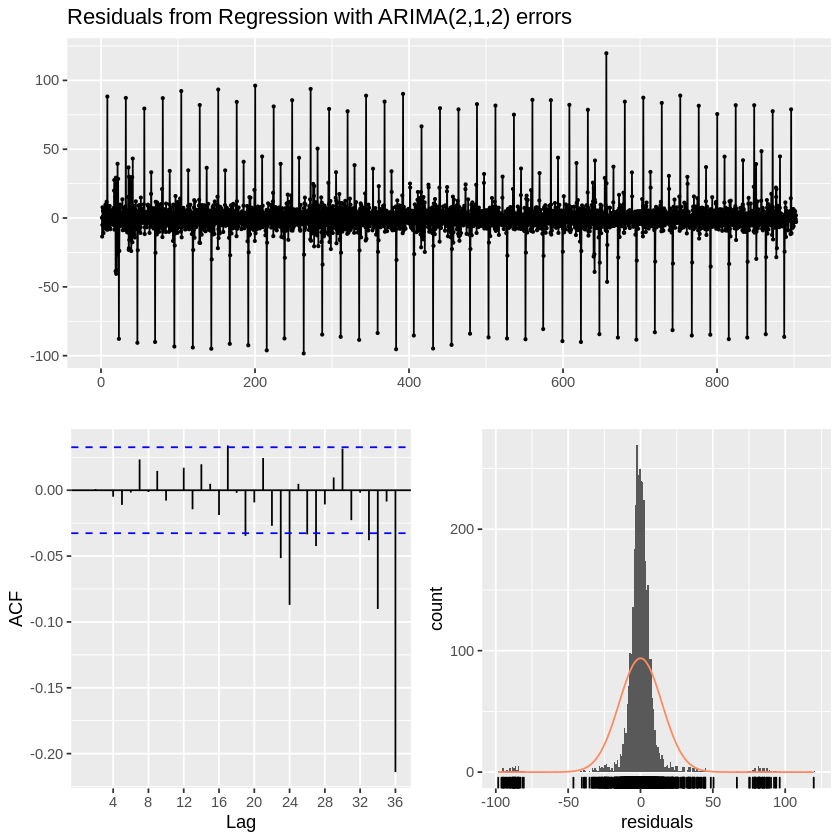

In [125]:
#**Dynamic regression model**

#Let's start with the function that automatically select the parameters
effect_temp_on_consum_train_T_ar = auto.arima(elec_consumption_train,xreg=temperature_train)

#autocorrelation of residuals 
checkresiduals(effect_temp_on_consum_train_T_ar,test="LB",plot=TRUE)

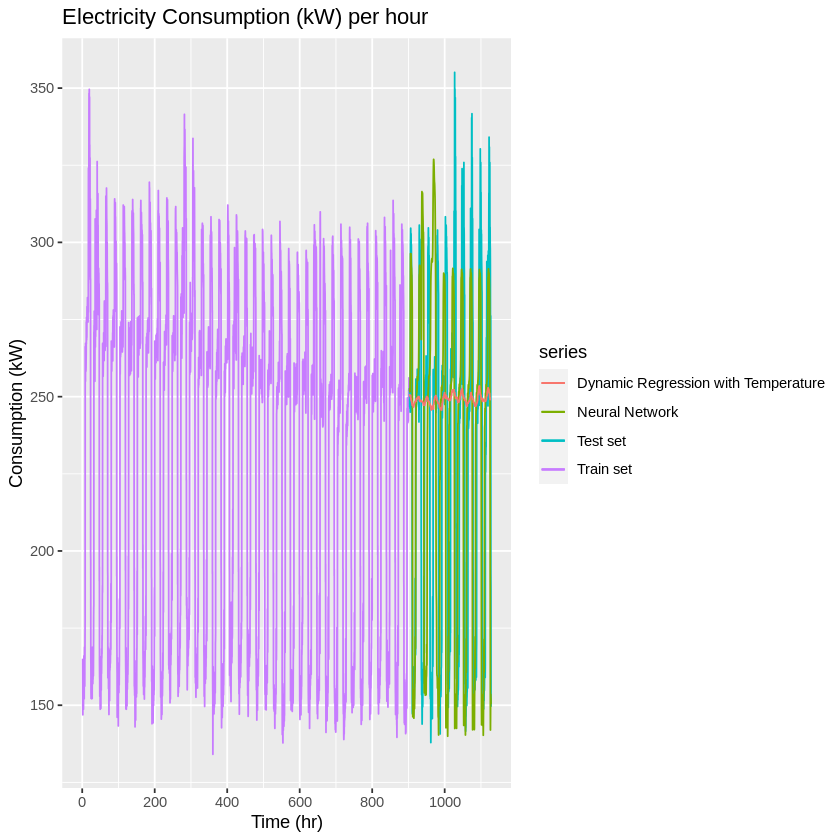

In [128]:
#We can See that all the auto-correlations of the residuals have been arranged with this model so we can validate the model and then forecast the test set.  

predict_test_T = forecast(effect_temp_on_consum_train_T_ar,xreg=temperature_test, h=900)

#Compare the prediction wit Neuron network model(without temperature)
autoplot(elec_consumption_train,series="Train set") + 
  autolayer(elec_consumption_test,series='Test set')+
  autolayer(pred_consumption_train_NN2$mean,series='Neural Network')+
  autolayer(predict_test_T$mean,series='Dynamic Regression with Temperature')+
  ggtitle ('Electricity Consumption (kW) per hour') +
  xlab('Time (hr)') +
  ylab('Consumption (kW)')

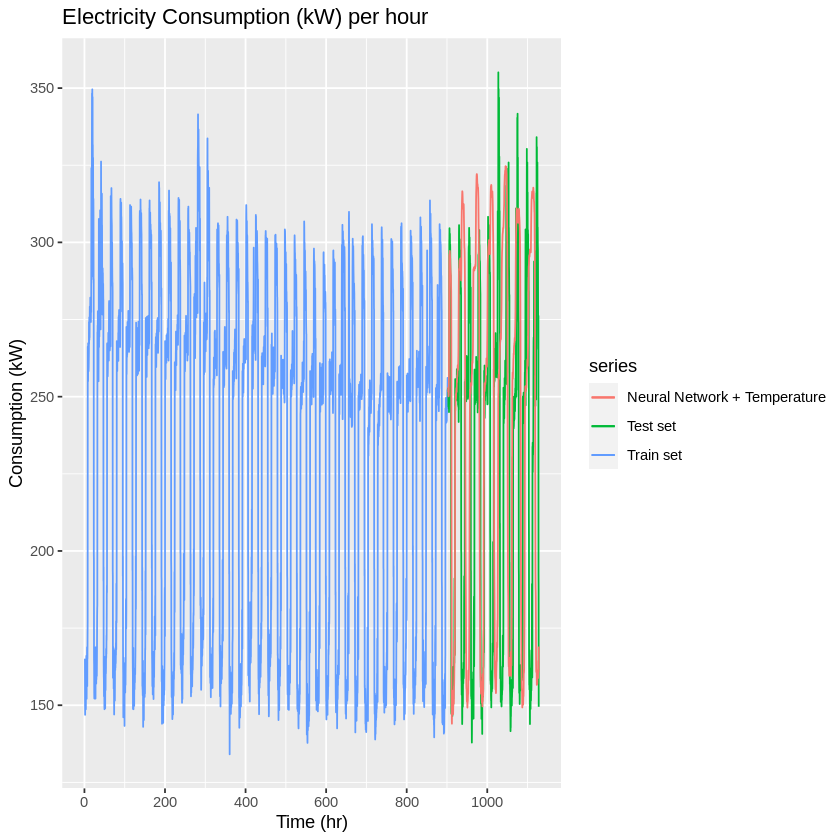

In [129]:

#This is good but as the best model we have so far is Neural Network maybe we should try them with temperature variable.

consumption_train_NN_T = nnetar(elec_consumption_train,34,2,24,lambda='auto',xreg=temperature_train)
pred_consumption_train_NN_T = forecast(consumption_train_NN_T, h = 900,xreg=temperature_test)
autoplot(elec_consumption_train,series="Train set") + 
  autolayer(elec_consumption_test,series='Test set')+
  autolayer(pred_consumption_train_NN_T$mean,series='Neural Network + Temperature')+
  ggtitle ('Electricity Consumption (kW) per hour') +
  xlab('Time (hr)') +
  ylab('Consumption (kW)')


In [130]:
#RMSE
print(sqrt(mean((pred_consumption_train_NN_T$mean-consum_test)^2)))

[1] 83.42295


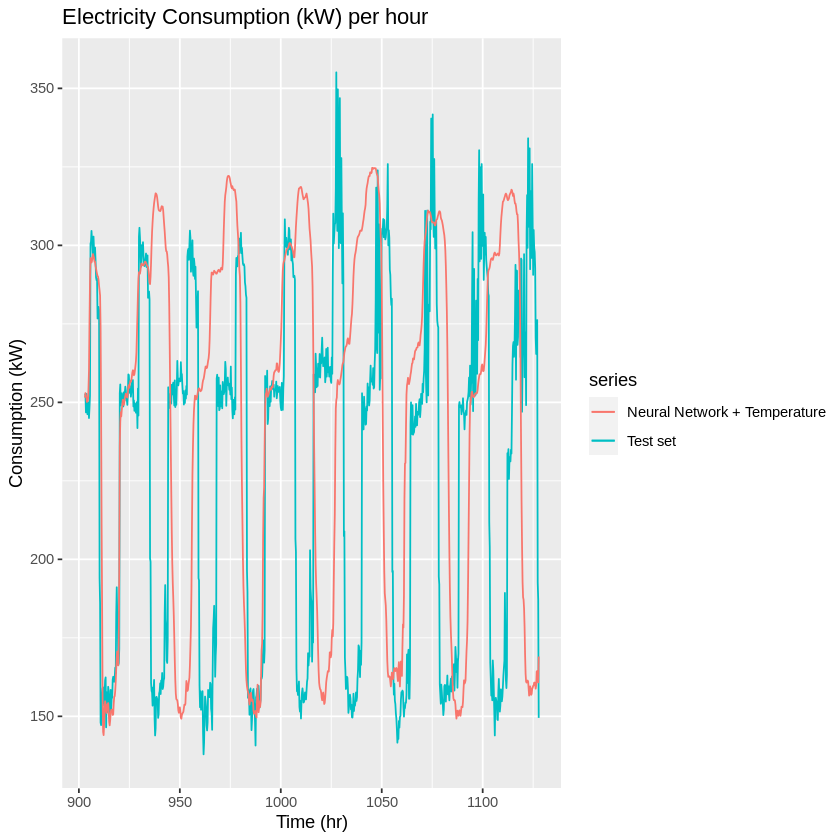

In [131]:
#We can zoom in the prediction.

autoplot(elec_consumption_test,series='Test set') + 
  autolayer(pred_consumption_train_NN_T$mean,series='Neural Network + Temperature')+
  ggtitle ('Electricity Consumption (kW) per hour') +
  xlab('Time (hr)') +
  ylab('Consumption (kW)')

In [132]:
#let's forecast electricity consumption on 17th Feb based on temperature of that day.

#new time series tool for forecast
temperature_17 <- ts(data[4509:4603,3], frequency = 4, start=c(1,2))
head(temperature_17) 


,Qtr1,Qtr2,Qtr3,Qtr4
1,,11.11111,11.11111,11.11111
2,11.11111,10.55556,10.55556,


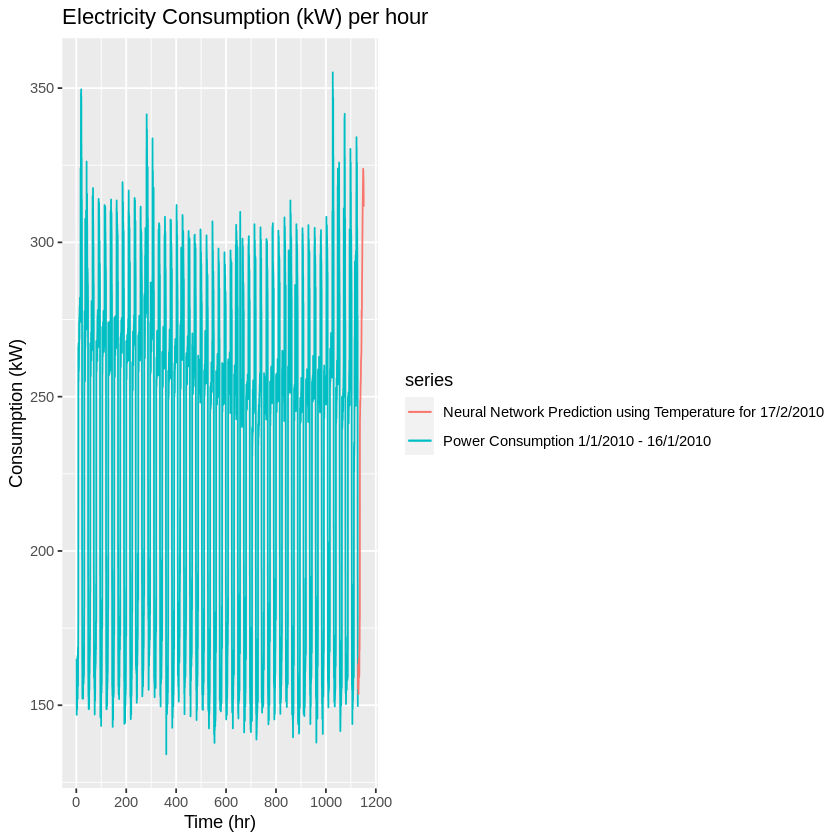

In [133]:
consumption_NN_T_17 = nnetar(elec_consumption,34,2,24,lambda='auto',xreg=temperature)
pred_consumption_NN_T_17 = forecast(consumption_NN_T_17, h = 96,xreg=temperature_17)
autoplot(elec_consumption,series="Power Consumption 1/1/2010 - 16/1/2010") + 
  autolayer(pred_consumption_NN_T_17$mean,series='Neural Network Prediction using Temperature for 17/2/2010')+
  ggtitle ('Electricity Consumption (kW) per hour') +
  xlab('Time (hr)') +
  ylab('Consumption (kW)')

In [134]:
#Prediction results
Prediction_T = print(pred_consumption_NN_T_17)

         Qtr1     Qtr2     Qtr3     Qtr4
1128 164.5108 153.6399 160.1526 155.3173
1129 157.6391 162.3815 154.6092 155.7969
1130 155.6455 149.2854 152.8540 149.9972
1131 155.4825 161.7855 157.5042 162.5827
1132 162.4345 164.2114 162.9722 163.3140
1133 162.5536 160.1185 157.2210 158.9290
1134 160.1870 165.4160 169.7027 168.4571
1135 165.4538 165.7797 171.2046 173.3706
1136 182.6088 232.6559 235.6146 237.2902
1137 233.5153 239.5340 237.1337 238.6792
1138 244.3224 247.2836 248.6428 249.3476
1139 250.1627 250.7541 249.7298 251.1774
1140 251.8354 255.3354 257.3839 258.4127
1141 258.2747 258.9590 259.6564 260.3551
1142 259.9145 261.0403 264.1917 266.7148
1143 270.9367 273.7076 275.2996 274.3971
1144 276.3918 278.2360 284.2256 285.9703
1145 288.3631 290.6083 291.8791 295.1681
1146 298.7292 300.9035 304.2173 306.4232
1147 307.7907 310.2846 311.9369 313.4161
1148 315.5020 316.8640 317.3487 318.7382
1149 320.1667 321.5064 322.3320 321.8793
1150 320.7870 320.1347 320.1930 321.1678
1151 320.1239 31

In [137]:
#Save prediction results to csv file
library("readr")
write_csv(Prediction_T,file="Prediction with Temperature.csv")

In [ ]:
#Conclusion:
#The best forecast model we have is Neural Network auto-regression (NNAR) with outside temperature consideration.
#The main advantage of NNAR are more flexible and can modelized non-linear relation like in our case.